GitHub link : https://github.com/JAuriac/MS-HPC-AI-GPU/tree/dev_mshpcai_JAuriac <br>
GPU server link : /home/Julian.AURIAC/MS-HPC-AI-GPU

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df32 = pd.read_csv("./csv/GPU32.csv", sep=';', header=0, names=['size','nbIte','time','bandwith'])
df32_max = pd.read_csv("./csv/GPU32_max.csv", sep=';', header=0, names=['size','nbIte','time','bandwith'])
df100_10 = pd.read_csv("./csv/GPU100_10.csv", sep=';', header=0, names=['size','nbIte','time','bandwith'])
df100_10_max = pd.read_csv("./csv/GPU100_10_max.csv", sep=';', header=0, names=['size','nbIte','time','bandwith'])
#dfCPU_max = pd.read_csv("MS-HPC-AI-GPU/code/mini-projet/LBM/cpp/LBM_cpp/src/CPU_max.csv", sep=';', header=0, names=['size','nbIte','time'])

1555.2 because: Memory Clock Rate 1215Mhz (/ 1000 to get Ghz) * (Memory Bus Width (5120bit / 8 channels) * 2 because reading and writing)

In [3]:
max_bandwidth = 1215 / 1000 * 5120 / 8 * 2

As we try to maximize our computing time, loading as much inputs as we can to increase our bandwidth usage and coalescence become a priority. As we try to approach blocksizes of 1024 (our maximum on this hardware) the following two sizes were used: 32\*32 and 100\*10, as well as a third size: 32\*10 to gave us a potential comparison. <br>

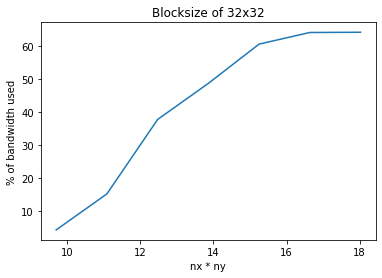

In [20]:
plt.xlabel("nx * ny")
plt.ylabel("% of bandwidth used")
plt.title("Blocksize of 32x32, on 200 iterations")
plt.plot(np.log(df32['size']), df32['bandwith']/max_bandwidth*100)

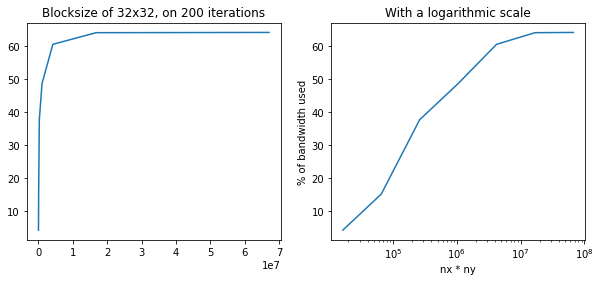

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
plt.xlabel("nx * ny")
plt.ylabel("% of bandwidth used")
axes[0].plot((df32['size']), df32['bandwith']/max_bandwidth*100)
axes[0].set_title("Blocksize of 32x32, on 200 iterations")
axes[1].plot((df32['size']), df32['bandwith']/max_bandwidth*100)
axes[1].set_xscale("log") # The log transformation
axes[1].set_title("With a logarithmic scale");

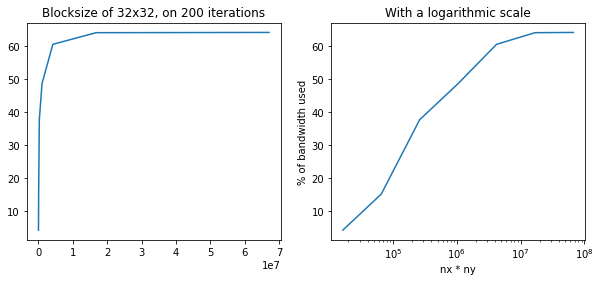

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
plt.xlabel("nx * ny")
plt.ylabel("% of bandwidth used")
axes[0].plot((df32['size']), df32['bandwith']/max_bandwidth*100)
axes[0].set_title("Blocksize of 32x32, on 200 iterations")
axes[1].plot((df32['size']), df32['bandwith']/max_bandwidth*100)
axes[1].set_xscale("log") # The log transformation
axes[1].set_title("With a logarithmic scale");

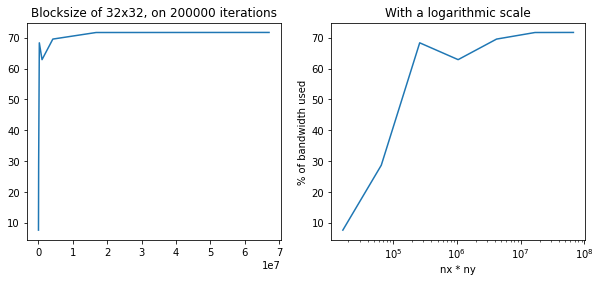

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
plt.xlabel("nx * ny")
plt.ylabel("% of bandwidth used")
axes[0].plot((df32_max['size']), df32_max['bandwith']/max_bandwidth*100)
axes[0].set_title("Blocksize of 32x32, on 200000 iterations")
axes[1].plot((df32_max['size']), df32_max['bandwith']/max_bandwidth*100)
axes[1].set_xscale("log") # The log transformation
axes[1].set_title("With a logarithmic scale");

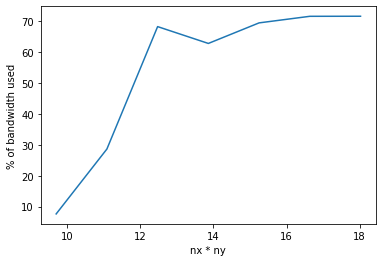

In [5]:
plt.xlabel("nx * ny")
plt.ylabel("% of bandwidth used")
plt.title("Blocksize of 32x32, on 200000 iterations")
plt.plot(np.log(df32_max['size']), df32_max['bandwith']/max_bandwidth*100)

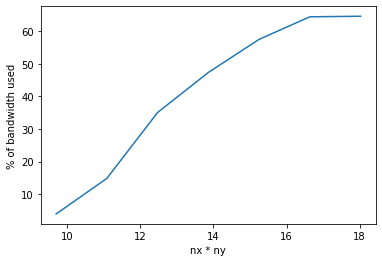

In [6]:
plt.xlabel("nx * ny")
plt.ylabel("% of bandwidth used")
plt.plot(np.log(df100_10['size']), df100_10['bandwith']/max_bandwidth*100)

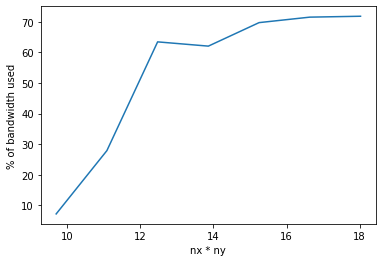

In [7]:
plt.xlabel("nx * ny")
plt.ylabel("% of bandwidth used")
plt.plot(np.log(df100_10_max['size']), df100_10_max['bandwith']/max_bandwidth*100)

In [8]:
#plt.xlabel("Number of iterations")
#plt.ylabel("Time elapsed")
#plt.plot(np.log(df32_max['nbIte']), df32_max['time'])
#plt.plot(np.log(dfCPU_max['nbIte']), dfCPU_max['time'])

With the default number of iterations of 200000, and nx and ny sizes of 256 and 64 respectively, we can compare cpu and gpu performance: <br>
With a processor we get 1934.096006 seconds (so approximately 0:30), while with our GPU we get 6.851438 seconds <br><br>
With nx and ny sizes of 512 and 128, we obtains the following: <br>
With a processor we get ~8000 seconds (so approximately 2:15), while with our GPU we get 7.293940 seconds <br><br>
As we can see, the relative difference between CPU and GPU is evolving with an exponential trend (4x here)